In [1]:
!pip install interpret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


from interpret.glassbox import LogisticRegression
from interpret import show

In [3]:
with open("../Processing/vocab.txt", "r",encoding="utf-8")as f :
    vocab = f.read().split("\n")
    

In [43]:
cyberpunk = pd.read_csv("../Processing/processed_files/wattpad/cyberpunk-encoded.csv")
cyberpunk.head(2)

,one,like,said,back,would,could,time,eye,know,get,...,blurred,armored,handsome,linked,satellite,mortal,decent,genre_text,story_title,story_id
0,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,cyberpunk,The Last Cyberspace 2070,303599009-the-last-cyberspace-2070
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,cyberpunk,"""Glowave"" A cyberpunk/synthwave video game",209745413-glowave-a-cyberpunk-synthwave-video-...


# Space VS Cyberpunk

In [40]:
space = pd.read_csv("../Processing/processed_files/wattpad/space-encoded.csv").drop(columns=["story_title","story_id"])
merge_df = cyberpunk.append(space).sample(frac=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(merge_df.drop(columns=["genre_text"]), merge_df["genre_text"], test_size=0.33, random_state=42)

In [44]:

clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.8856304985337243

In [50]:
idx = clf.coef_[0] < 0.1
mots = X_train.columns
mots[idx]

Index(['one', 'like', 'said', 'back', 'would', 'could', 'time', 'eye', 'get',
       'hand',
       ...
       'butterfly', 'traveling', 'strangely', 'blurred', 'armored', 'handsome',
       'linked', 'satellite', 'mortal', 'decent'],
      dtype='object', length=2850)

# Romance VS Cyberpunk

In [18]:
romance = pd.read_csv("../Processing/processed_files/wattpad/romance-encoded.csv").drop(columns=["story_title","story_id"])
romance.head(2)

,one,like,said,back,would,could,time,eye,know,get,...,traveling,strangely,blurred,armored,handsome,linked,satellite,mortal,decent,genre_text
0,0,1,1,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,romance
1,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,romance


In [19]:
merge_df = cyberpunk.append(romance).sample(frac=1)

In [51]:
merge_df

,one,like,said,back,would,could,time,eye,know,get,...,traveling,strangely,blurred,armored,handsome,linked,satellite,mortal,decent,genre_text
176,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,cyberpunk
336,0,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,space
256,0,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,1,0,0,space
684,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,space
504,0,1,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,space
402,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,space
702,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,cyberpunk
497,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,cyberpunk


In [105]:
merge_df.groupby(["genre_text"]).describe()

one                                                 like  \
             count      mean       std  min  25%  50%  75%  max   count   
genre_text                                                                
cyberpunk    885.0  0.892655  0.309726  0.0  1.0  1.0  1.0  1.0   885.0   
romance     1183.0  0.998309  0.041100  0.0  1.0  1.0  1.0  1.0  1183.0   

                      ... mortal       decent                                \
                mean  ...    75%  max   count      mean       std  min  25%   
genre_text            ...                                                     
cyberpunk   0.890395  ...    0.0  1.0   885.0  0.088136  0.283652  0.0  0.0   
romance     0.998309  ...    0.0  1.0  1183.0  0.344886  0.475532  0.0  0.0   

                           
            50%  75%  max  
genre_text                 
cyberpunk   0.0  0.0  1.0  
romance     0.0  1.0  1.0  

[2 rows x 24000 columns]

In [52]:
cyberpunk.describe()

,one,like,said,back,would,could,time,eye,know,get,...,butterfly,traveling,strangely,blurred,armored,handsome,linked,satellite,mortal,decent
count,885.0,885.000000,885.000000,885.0,885.0,885.0,885.000000,885.00000,885.000000,885.0,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.0,0.890395,0.689266,0.0,0.0,0.0,0.856497,0.80339,0.772881,0.0,...,0.046328,0.081356,0.076836,0.097175,0.072316,0.076836,0.075706,0.059887,0.049718,0.088136
std,0.0,0.312573,0.463056,0.0,0.0,0.0,0.350783,0.39766,0.419207,0.0,...,0.210313,0.273536,0.266482,0.296364,0.259158,0.266482,0.264677,0.237412,0.217484,0.283652
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,1.00000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.00000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.00000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.00000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
romance.describe()

,one,like,said,back,would,could,time,eye,know,get,...,butterfly,traveling,strangely,blurred,armored,handsome,linked,satellite,mortal,decent
count,1181.0,1181.000000,1181.00000,1181.0,1181.0,1181.0,1181.000000,1181.000000,1181.000000,1181.0,...,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.00000,1181.000000
mean,0.0,0.976291,0.92718,0.0,0.0,0.0,0.965284,0.944962,0.960203,0.0,...,0.154953,0.187976,0.165114,0.100762,0.083827,0.215919,0.100762,0.127858,0.07282,0.167655
std,0.0,0.152205,0.25995,0.0,0.0,0.0,0.183138,0.228151,0.195564,0.0,...,0.362014,0.390859,0.371441,0.301141,0.277246,0.411632,0.301141,0.334073,0.25995,0.373717
min,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.0,1.000000,1.00000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.0,1.000000,1.00000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.0,1.000000,1.00000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,0.0,1.000000,1.00000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Régression logistique

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(merge_df.drop(columns=["genre_text"]), merge_df["genre_text"], test_size=0.33, random_state=42)

In [27]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [28]:
clf.score(X_test, y_test)

0.9838945827232797

In [62]:
idx = clf.coef_[0] <0
mots = X_train.columns
mots[idx]

Index(['one', 'like', 'back', 'could', 'time', 'eye', 'know', 'get', 'around',
       'man', 'go', 'light', 'city', 'world', 'mind', 'old', 'part', 'human',
       'building', 'sound', 'street', 'metal', 'gun', 'leg', 'use', 'system',
       'weapon', 'robot', 'skin', 'several', 'war', 'working', 'machine',
       'planet', 'computer', 'code', 'ai', 'spoke', 'calm', 'path', 'vision',
       'device', 'government', 'technology', 'neon', 'boot', 'data', 'shop',
       'yellow', 'dressed', 'dust', 'built', 'alley', 'project', 'lab',
       'virtual', 'tech', 'pistol', 'panel', 'drone', 'district', 'map',
       'wire', 'cat', 'flesh', 'citizen', 'interesting', 'concrete',
       'artificial', 'bike', 'universe', 'metallic', 'dry', 'digital',
       'advanced', 'tail', 'mechanical', 'bot', 'cracked', 'transport', 'gas',
       'suppose', 'glove', 'electric', 'rough', 'alleyway', 'web',
       'skyscraper', 'sell', 'health', 'population', 'highway', 'receive',
       'fourth', 'impressive',

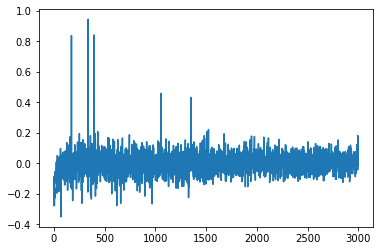

In [35]:
plt.plot( clf.coef_[0])

In [36]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)

In [37]:
clf.score(X_test, y_test)

0.9765739385065886

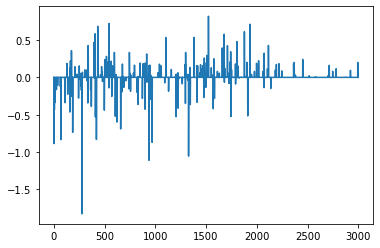

In [38]:
plt.plot( clf.coef_[0])

In [184]:
wc = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100
)


def LogReg1V1(cyberpunk_df,other_genre,seed = 1):
    
    other_df = pd.read_csv("../Processing/processed_files/wattpad/"+other_genre+"-encoded.csv")
    
    merge_df = cyberpunk_df.append(other_df).sample(frac=1)
    
    # Permet la suppression des histoires apparaissant dans deux genres différents
    merge_df.drop_duplicates(subset=['story_id'],keep=False,inplace=True)
    merge_df.drop(columns=["story_title","story_id"],inplace=True)
    
    X = merge_df.drop(columns=["genre_text"])
    y = merge_df["genre_text"]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

    y_train = y_train.apply(lambda x : 1 if x == "cyberpunk" else 0)

    y_test = y_test.apply(lambda x : 1 if x == "cyberpunk" else 0)



    lr = LogisticRegression(random_state=seed, penalty='l1', solver='liblinear')
    
    lr.fit(X_train, y_train)

    score = lr.score(X_test, y_test)

    lr_global = lr.explain_global(name="Logistic Regression")

    lr_local = lr.explain_local(X_test, y_test, name="Logistic Regression")
    
    
    ### Pour le nuage de mot
    
    words = cyberpunk_df.columns[0:3000]
    scores = lr_global.data()["scores"]
    
    res = {words[i]: scores[i] for i in range(len(words))}

    
    idx_1 = np.array(scores) > 0
    words_selected_1 = words[idx_1]

    words_1 = {key: res[key] for key in words_selected_1}
    wc1 = wordcloud.WordCloud(
        background_color = 'white', 
        max_words=200,
        max_font_size=100).generate_from_frequencies(words_1)
    
    idx_2 = np.array(scores) < 0
    words_selected_2 = words[idx_2]

    words_2 = {key: res[key]*-1 for key in words_selected_2}
    wc2 = wordcloud.WordCloud(
        background_color = 'white', 
        max_words=200,
        max_font_size=100).generate_from_frequencies(words_2)
    

    return {"model":lr, "accuracy": score,"lr_global":lr_global,"lr_local":lr_local,"wc1":wc1,"wc2":wc2}



(-0.5, 399.5, 199.5, -0.5)

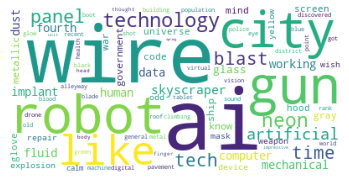

In [185]:
romanceLR = LogReg1V1(cyberpunk,"romance")
plt.imshow(romanceLR["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

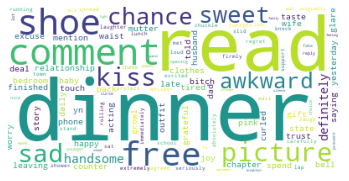

In [186]:
plt.imshow(romanceLR["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

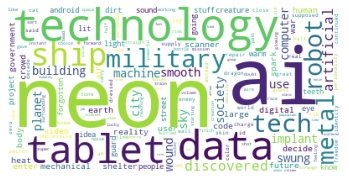

In [187]:
crimeLr = LogReg1V1(cyberpunk,"crime")
plt.imshow(crimeLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

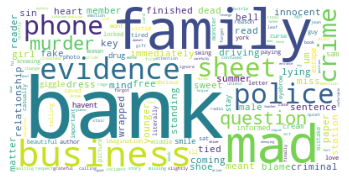

In [188]:
plt.imshow(crimeLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

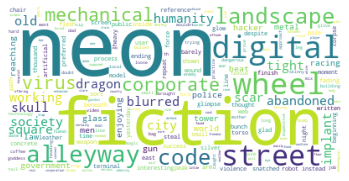

In [189]:
spaceLr = LogReg1V1(cyberpunk,"space")
plt.imshow(spaceLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

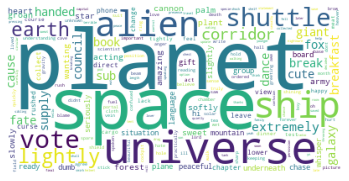

In [190]:
plt.imshow(spaceLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

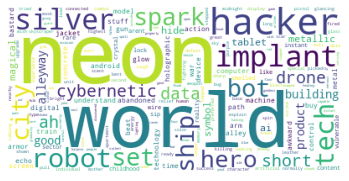

In [192]:
thrillerLr = LogReg1V1(cyberpunk,"thriller")
plt.imshow(thrillerLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

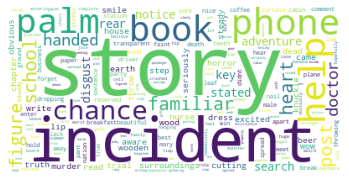

In [193]:
plt.imshow(thrillerLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

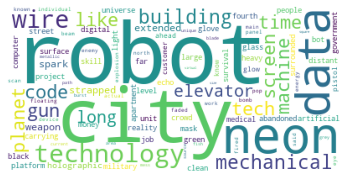

In [194]:
vampireLr = LogReg1V1(cyberpunk,"vampire")
plt.imshow(vampireLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

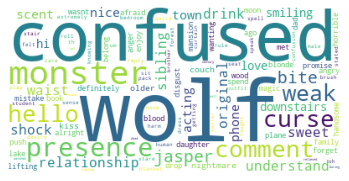

In [196]:
plt.imshow(vampireLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

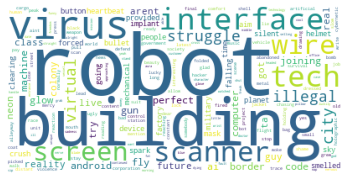

In [197]:
fantasyLr = LogReg1V1(cyberpunk,"fantasy")
plt.imshow(fantasyLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

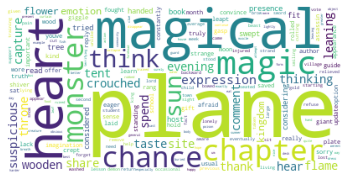

In [198]:
plt.imshow(fantasyLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

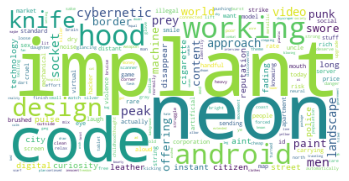

In [201]:
science_fantasyLr = LogReg1V1(cyberpunk,"science-fantasy")
plt.imshow(science_fantasyLr["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

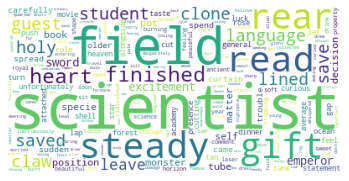

In [202]:
plt.imshow(science_fantasyLr["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

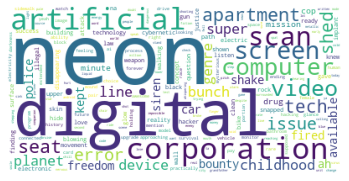

In [203]:
steampunlLR = LogReg1V1(cyberpunk,"steampunk")
plt.imshow(steampunlLR["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

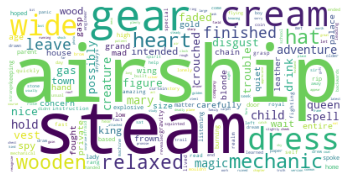

In [204]:
plt.imshow(steampunlLR["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

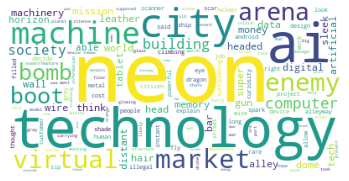

In [205]:
horrorLR = LogReg1V1(cyberpunk,"horror")
plt.imshow(horrorLR["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

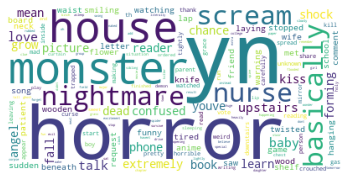

In [206]:
plt.imshow(horrorLR["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

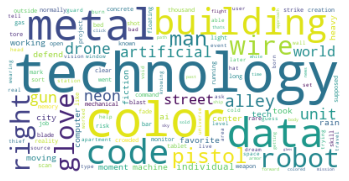

In [209]:
homourLR = LogReg1V1(cyberpunk,"humour")
plt.imshow(homourLR["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

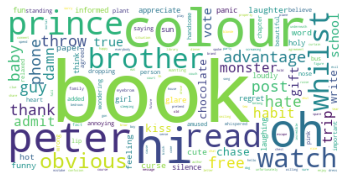

In [210]:
plt.imshow(homourLR["wc2"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

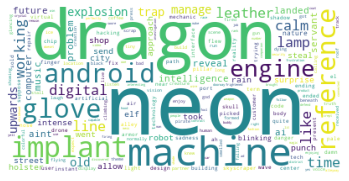

In [207]:
dystopieLR = LogReg1V1(cyberpunk,"dystopie")
plt.imshow(dystopieLR["wc1"])
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

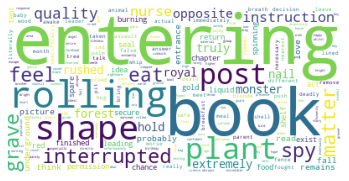

In [208]:
plt.imshow(dystopieLR["wc2"])
plt.axis('off')